<font size="3">**Important:**</font> 
<br />My initial approach to the problem completely shifted during the second to last day of my deadline(two weeks after I submitted my qosf application). I made an assumption that this was the quantum tic-tac-toe game. However, I asked one of the qosf staff if my assumption is correct, but it was not. It is actually classical tic-tac-toe. This completely shifted my approach to the problem. The solution I have here is a result of a few hours of work after I found out this was based off of classical tic-tac-toe(although I did spend more time on this problem but with a false assumption of this being quantum tic-tac-toe, and therefore that was irrelevant work). If given a bit more time, I could have given a better and complete analysis of my solution. Therefore, I apologize in advance for a poor presentation. However, I hope I may still be considered for the QOSF cohort5. Quantum Information, and Quantum Computing is very exciting and I would like to contribute to the field! Thank you for your time!

<font size="5">**Cohort 5 - Task 3 Find best results**</font>

For this problem you have the following situation: you are playing a game of tic-tac-toe, and you find the situation in the figure below, next is your turn, develop a quantum algorithm to be able to find the best decisions with higher probability.

 


The following considerations apply:
You are the X's.
The matrix as a qubit and the state of the X's is |1> and of the O's is |0>, of the empty cells an unknown state.
What are the valid combinations to win?
You have at most 2 turns

A hint for this exercise should consider all the possible ways to win that (there’s 8 of them), for this exercise must obtain with probability the state with the highest probability.


for the output only give the status of the empty boxes, you consider this example: 

If you think the solution is put the values 

X | O | O 
X | X  | X
O | O | O

The state output must be |1100>




Bonus : what if we start one step earlier and your opponent has not chosen yet, as shown in the following image, it shows with higher probability the chances of you winning. Please refer to the above considerations.




<font size="5"> **Finding the best decisions in Classical Tic-Tac-Toe using Grovers Algorithm**</font>

<font size="3">**Author:** Daniel Mendez</font> (I worked alone on this assignment)

<font size="3"><br />**Assumptions(Q/A with Alberto Maldonado):**</font>
<br />1) May model this tic tac toe game as a 9-qubit system. However, I will model just the empty cells as a 4 qubit system. 
<ol>
  <li>$|q_{0}>$ is the top left empty cell.</li>
  <li>$|q_{1}>$ is the top right empty cell.</li>
  <li>$|q_{2}>$ is the bottom left empty cell.</li>
  <li>$|q_{3}>$ is the bottom right empty cell.</li>
</ol>
<br />2) May model each empty cell as an equal superposition, |+>. (must consider that the Xs win, considering the proposed scenario)
<br />3) Before the other player chooses a cell, they have an equal probability of choosing any of the empty cells(i.e. Uniform Distribution). Similarly, for myself.
<br />4) "It is the classic tic-tac-toe, the objective is to design the quantum algorithm for decision making, in order to find the best strategy for you to win in the conditions stated in the description. You are X and you must see from the scenario what possible future scenarios you must choose to win, but you must also consider your opponent's decisions. Therefore look for what is best for you in your turn."
<br />5) Will run my circuit on a simulator to focus more on the algorithm itself.

<font size="3"><br />**Solution:**</font>
<br />I will use Grovers Algorithm to find the tic-tac-toe board setups that would allow me to win.

<br />Step 1) **Set-up**
<br /> I start with a 4 qubit system $|\psi>=|q_{3} q_{2} q_{1} q_{0}>$ of the empty cells. By assumption 2, I have $$|\psi>=|++++>$$ which gives $2^{4}$ possible states $|\psi>$ may collapse to when measured. This means there are 16 possible setups for the combined 4 empty cells.

In [15]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import Diagonal, AND

# import basic plot tools
from qiskit.visualization import plot_histogram

# Create Quantum Circuit
#qc = QuantumCircuit(4)
def initialize_qc(qc, qubits):
    for i in qubits: 
        qc.h(i)
    return qc

<br />Step 2) **Making an Oracle**
<br />Taking a quick look at the task prompt, it is easy to see that 2 of the 16 setups will allow me to win. Namely, $|\psi_{1}>=|0011>$ and $|\psi_{2}>=|1001>$. These will be my solution states. My oracle, $U_{\omega}$, will be a diagonal matrix with a negative phase to these two solutions states. 
$$U_{\omega}=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}$$

<br />Based off of $U_{\omega}$, I will mark the states |0011> and |1001> in my quantum circuit

In [16]:
oracle = Diagonal([1,1,1,-1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1])
oracle.name = "U$_\omega$"

<br />Step 3) **Make a Diffuser**
<br /> Use the general diffuser function in qiskit, but for 4 qubits.

In [17]:
# NOTE: THIS IS NOT MY CODE. THIS IS FROM THE QISKIT WEBSITE!
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

<br />Step 4) **Put it all together**
<br /> Create the full circuit of Grovers Algorithm

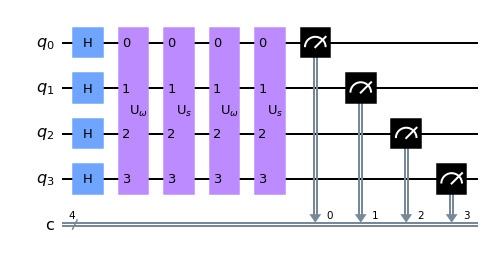

In [18]:
numQubits = 4
qubitList = QuantumRegister(4, 'q')  # [0,1,2,3]
cbitList = ClassicalRegister(4, 'c') # [0,1,2,3]

qc = QuantumCircuit(qubitList, cbitList)
qc = initialize_qc(qc, qubitList)

# Will run two iterations since we have 2 solutions, but 16 possible states we may obtain when measuring. 
for i in range(2):
    qc.append(oracle, qubitList)
    qc.append(diffuser(numQubits), qubitList)


qc.measure(qubitList, cbitList)
qc.draw()

<br />**Not part of Game**
<br />Seeing what the Results look like when running Circuit on a Simulation with 1024 shots. I want my circuit to provide a high probability of either measuring $|\psi_{1}>=|0011>$ or $|\psi_{2}>=|1001>$

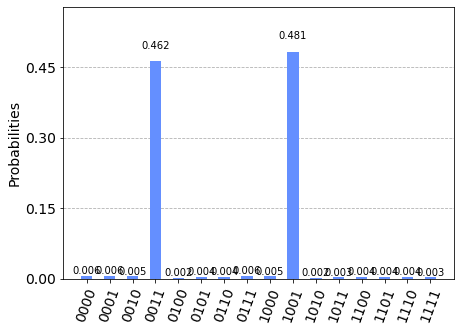

In [19]:
aer_sim = Aer.get_backend('aer_simulator')

#qc.save_statevector()
transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
results = aer_sim.run(qobj, memory=True).result()
counts = results.get_counts()
#print(counts)
plot_histogram(counts)

# For debugging purposes.
#final_state = results.get_statevector()
#from qiskit.visualization import array_to_latex
#array_to_latex(final_state, prefix="\\text{Statevector} = ")

<br />Step 5) **My first measurement(i.e. first turn)**
<br />Run Circuit on simulation with only 1 shot. In the classical tic-tac-toe game I would only get one chance to measure the four qubit system, therefore, I will run my circuit only once.

In [20]:
aer_sim = Aer.get_backend('aer_simulator')

transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
results = aer_sim.run(qobj, shots=1, memory=True).result()
plot_histogram(counts)
samples = results.get_memory()
print("c3c2c1c0: ", samples)

c3c2c1c0:  ['1001']


<br />My resulting measurement will provide me with a game winning board configuration. However, I may only choose to mark an **X** on one of the empty cells. For example, if I receive:
<br />$$c3=0, c2=0, c1=1, c0=1$$
<br /> Then I will choose to mark an **X** on either the empty cell corresponding to $|q_{1}>$ or mark an **X** on the empty cell corresponding to $|q_{0}>$ with equal probability. (Assumption 3, states uniform distribution.)

<br />Similarly, If I receive:
<br />$$c3=1, c2=0, c1=0, c0=1$$
<br />Then I will choose either to mark an **X** on either the empty cell corresponding to $|q_{3}>$ or mark an **X** on the empty cell corresponding to $|q_{0}>$ with equal probability. (Assumption 3, states uniform distribution.)
<br /><br />For the purposes of an example, lets say I choose to mark an **X** on the cell corresponding to $|q_{0}>$

<br />Step 6) **Opponents first measurement(i.e. their first turn)**
<br />According to assumption 3, the opponent also marks one of the three empty cells with equal probability. Lets say they mark an O on the empty cell corresponding to $|q_{4}>$

<br />Step 7) **My second measurement(i.e. my second turn)**
<br />Now there are two empty cells left. Similar to before, I just need to run Grovers algorithm to find me the optimal strategy to win.

<br />Step 8) **Finished**

**Probability Analysis (Incomplete due to time restrictions) :**
<br />Step 1) Represent four empty cells as a mixed state. When I see the board, I am guaranteed to be given 4 empty cells in superposition(assumption2). Therefore, I have a pure state, $$\rho$$
<br />Step 2) I measure a cell.
<br />Step 3) When the opponent sees the board, they may receive 1 of 4 possible board setups. Therefore, they have a mixed state.
<br />Step 4) Opponent measures a cell.
<br />Step 5) Etc...

<font size="3">**References:**</font>
<br />I used some code from the Grovers Algorithm section of the Qiskit website, but changed a few parts to fit my needs for this task3: https://qiskit.org/textbook/ch-algorithms/grover.html#1.-Introduction-